<a href="https://colab.research.google.com/github/valfaro-v2/MagolegoTeamProject/blob/master/Shap_try.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import shap
import transformers
import torch
import numpy as np
import scipy as sp
import torch

import pandas as pd

In [6]:
df_shap = pd.read_csv('tripadvisor_hotel_reviews.csv')

five_star_ratings_index = df_shap.index[df_shap['Rating']==5].tolist() #select rows labeled with 5

df_shap = df_shap.drop(index=five_star_ratings_index) #drop the rows that we selected
df_shap = df_shap.reset_index()
df_shap = df_shap.drop(columns=['index'])

NUMBER_OF_ROWS = df_shap.shape[0]

df_shap_sentiment = pd.DataFrame(data = np.zeros(NUMBER_OF_ROWS), columns=['Sentiment'],dtype='int64') #we create the sentiment column
df_shap_model = pd.concat([df_shap,df_shap_sentiment], axis = 1)

for i in range(NUMBER_OF_ROWS): #we update the sentiment column
  if df_shap_model.at[i,'Rating']==4:
    df_shap_model.at[i,'Sentiment']=1
    
print('The first rows of the dataframe would now look as follows:')
df_shap_model = df_shap_model.drop(columns=['Rating'])
df_shap_model

The first rows of the dataframe would now look as follows:


,Review,Sentiment
0,nice hotel expensive parking got good deal sta...,1
1,ok nothing special charge diamond member hilto...,0
2,nice rooms not 4* experience hotel monaco seat...,0
3,"excellent staff, housekeeping quality hotel ch...",1
4,"poor value stayed monaco seattle july, nice ho...",0
...,...,...
11432,not impressed unfriendly staff checked asked h...,0
11433,great location price view hotel great quick pl...,1
11434,"ok just looks nice modern outside, desk staff ...",0
11435,hotel theft ruined vacation hotel opened sept ...,0


In [7]:
short_data = [v[:500] for v in df_shap_model["Review"][:20]]

In [8]:
classifier = transformers.pipeline('sentiment-analysis', return_all_scores=True)
classifier(short_data[:20])

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

[[{'label': 'NEGATIVE', 'score': 0.9736725687980652},
  {'label': 'POSITIVE', 'score': 0.026327459141612053}],
 [{'label': 'NEGATIVE', 'score': 0.9972202777862549},
  {'label': 'POSITIVE', 'score': 0.002779704285785556}],
 [{'label': 'NEGATIVE', 'score': 0.9974591135978699},
  {'label': 'POSITIVE', 'score': 0.0025408740621060133}],
 [{'label': 'NEGATIVE', 'score': 0.0016972891753539443},
  {'label': 'POSITIVE', 'score': 0.998302698135376}],
 [{'label': 'NEGATIVE', 'score': 0.9650847315788269},
  {'label': 'POSITIVE', 'score': 0.034915320575237274}],
 [{'label': 'NEGATIVE', 'score': 0.0008171311928890646},
  {'label': 'POSITIVE', 'score': 0.9991828799247742}],
 [{'label': 'NEGATIVE', 'score': 0.004317526239901781},
  {'label': 'POSITIVE', 'score': 0.9956824779510498}],
 [{'label': 'NEGATIVE', 'score': 0.9968722462654114},
  {'label': 'POSITIVE', 'score': 0.003127782139927149}],
 [{'label': 'NEGATIVE', 'score': 0.0007739876164123416},
  {'label': 'POSITIVE', 'score': 0.9992259740829468}]

In [9]:
explainer = shap.Explainer(classifier)

In [10]:
shap_values = explainer(short_data[:20])

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer:   5%|▌         | 1/20 [00:00<?, ?it/s]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer:  15%|█▌        | 3/20 [01:45<07:19, 25.88s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer:  20%|██        | 4/20 [02:44<10:32, 39.51s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer:  25%|██▌       | 5/20 [03:40<11:26, 45.77s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer:  30%|███       | 6/20 [04:20<10:12, 43.74s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer:  35%|███▌      | 7/20 [04:59<09:05, 42.00s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer:  40%|████      | 8/20 [05:54<09:14, 46.22s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer:  45%|████▌     | 9/20 [06:47<08:53, 48.54s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer:  50%|█████     | 10/20 [07:09<06:41, 40.14s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer:  55%|█████▌    | 11/20 [08:06<06:48, 45.36s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer:  60%|██████    | 12/20 [09:02<06:27, 48.48s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer:  65%|██████▌   | 13/20 [09:56<05:51, 50.23s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer:  70%|███████   | 14/20 [10:32<04:36, 46.11s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer:  75%|███████▌  | 15/20 [10:57<03:17, 39.52s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer:  80%|████████  | 16/20 [11:50<02:54, 43.70s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer:  85%|████████▌ | 17/20 [12:25<02:02, 40.91s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer:  90%|█████████ | 18/20 [13:11<01:24, 42.45s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer:  95%|█████████▌| 19/20 [14:06<00:46, 46.24s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 100%|██████████| 20/20 [14:33<00:00, 40.41s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 21it [14:58, 44.91s/it]


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


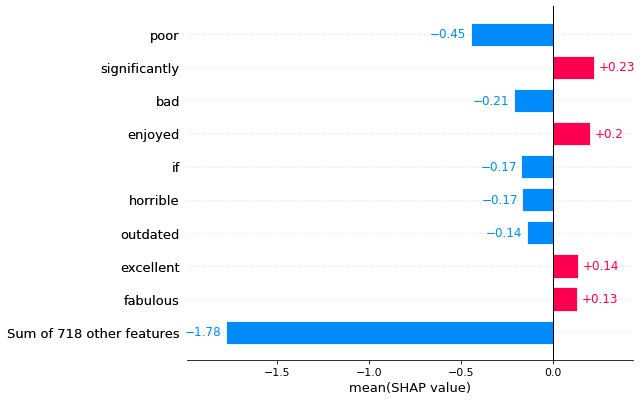

In [11]:
shap.plots.bar(shap_values[:, :, "POSITIVE"].mean(0))